# Exploratory Data Analysis (EDA)
## Learning Progress Prediction - DATAFLOW 2026

Notebook này thực hiện phân tích khám phá dữ liệu để hiểu rõ đặc điểm của bài toán.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent.parent))
from src.utils import set_seed

set_seed(42)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

from src.config import *
from src.data_loader import prepare_data
from src.utils import set_seed

# Settings
set_seed(RANDOM_STATE)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ Setup complete!")

✓ Setup complete!


## 1. Load Data

In [6]:
# Load data
data = prepare_data(TRAIN_SEMESTER_END, VALID_SEMESTER, TEST_SEMESTER)

admission_df = data['admission']
academic_df = data['academic']
full_df = data['full']
train_df = data['train']
valid_df = data['valid']

📂 Đang đọc dữ liệu...

Admission Data
Số dòng: 30,217
Số cột: 6
Missing values:
Series([], dtype: int64)


Academic Records Data
Số dòng: 105,726
Số cột: 6
Missing values:
Series([], dtype: int64)


✓ Đã merge dữ liệu: 105,726 records

📊 Phân chia dữ liệu:
  - Train: 90,582 records (đến hết HK1 2023-2024)
  - Valid: 15,144 records (HK2 2023-2024)
  - Test: 0 records (HK1 2024-2025)


## 2. Phân tích Admission Data

In [7]:
# Thông tin cơ bản
print("Admission Data Info:")
print(admission_df.info())
print("\nStatistical Summary:")
print(admission_df.describe())

Admission Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30217 entries, 0 to 30216
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MA_SO_SV         30217 non-null  object 
 1   NAM_TUYENSINH    30217 non-null  int64  
 2   PTXT             30217 non-null  object 
 3   TOHOP_XT         30217 non-null  object 
 4   DIEM_TRUNGTUYEN  30217 non-null  float64
 5   DIEM_CHUAN       30217 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB
None

Statistical Summary:
       NAM_TUYENSINH  DIEM_TRUNGTUYEN    DIEM_CHUAN
count   30217.000000      30217.00000  30217.000000
mean     2021.790979         23.09548     21.173715
std         2.309299          3.76811      3.475354
min      2018.000000          0.00000      0.000000
25%      2020.000000         21.13000     18.940000
50%      2022.000000         23.30000     21.610000
75%      2024.000000         24.92000     23.58000

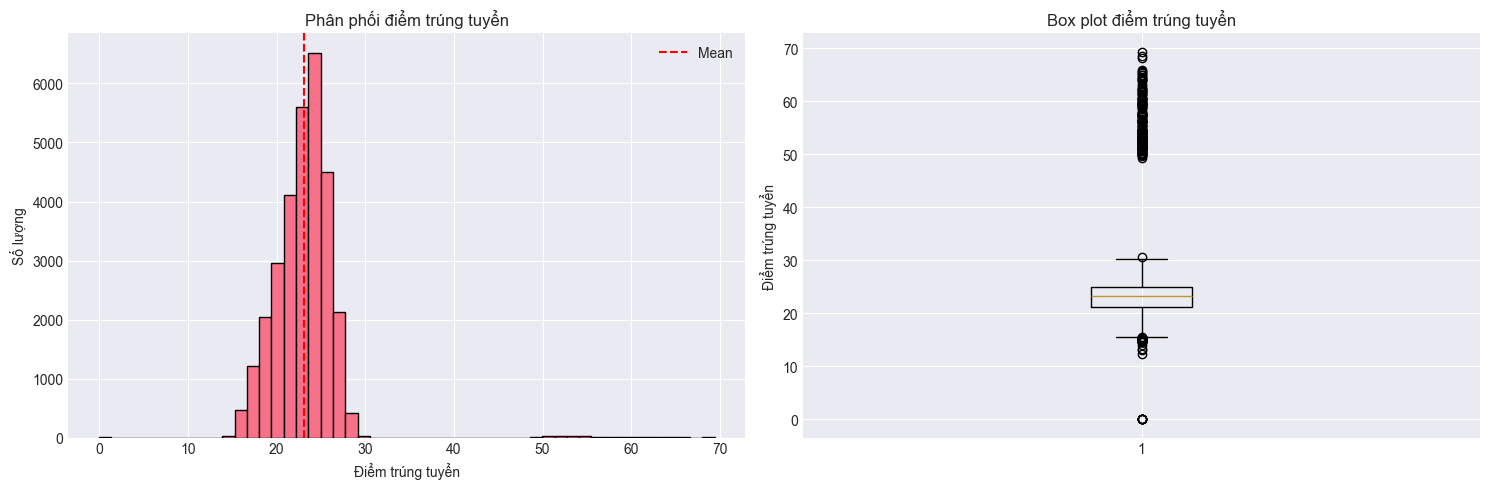

In [8]:
# Phân phối điểm trúng tuyển
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(admission_df['DIEM_TRUNGTUYEN'], bins=50, edgecolor='black')
axes[0].set_xlabel('Điểm trúng tuyển')
axes[0].set_ylabel('Số lượng')
axes[0].set_title('Phân phối điểm trúng tuyển')
axes[0].axvline(admission_df['DIEM_TRUNGTUYEN'].mean(), color='red', linestyle='--', label='Mean')
axes[0].legend()

# Box plot
axes[1].boxplot(admission_df['DIEM_TRUNGTUYEN'], vert=True)
axes[1].set_ylabel('Điểm trúng tuyển')
axes[1].set_title('Box plot điểm trúng tuyển')

plt.tight_layout()
plt.show()

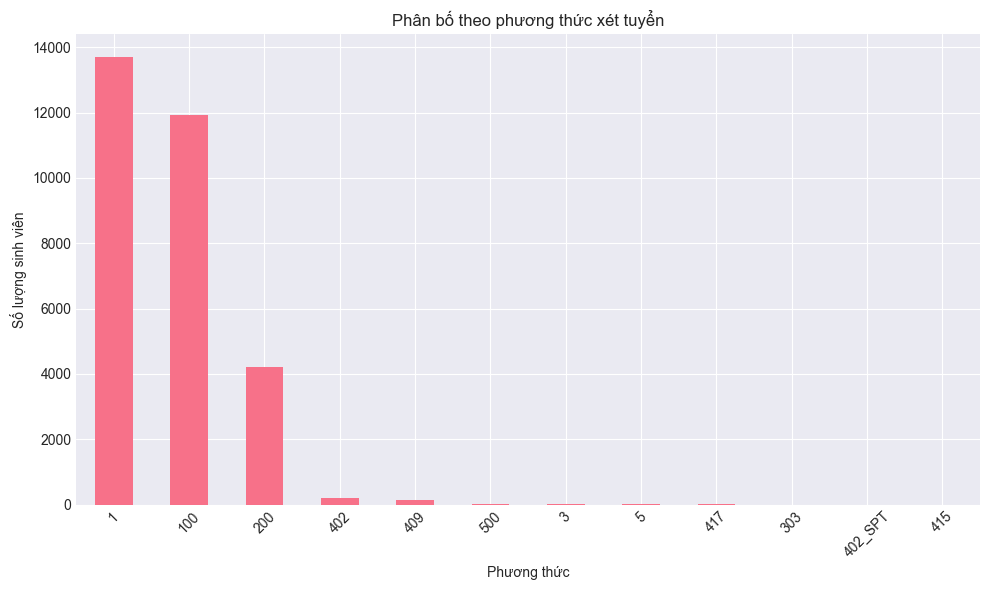

In [9]:
# Phân tích theo phương thức xét tuyển
ptxt_counts = admission_df['PTXT'].value_counts()

plt.figure(figsize=(10, 6))
ptxt_counts.plot(kind='bar')
plt.title('Phân bố theo phương thức xét tuyển')
plt.xlabel('Phương thức')
plt.ylabel('Số lượng sinh viên')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Phân tích Academic Records

In [10]:
# Thống kê cơ bản
print("Academic Records Info:")
print(academic_df.info())
print("\nStatistical Summary:")
print(academic_df.describe())

Academic Records Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105726 entries, 0 to 105725
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MA_SO_SV        105726 non-null  object 
 1   HOC_KY          105726 non-null  object 
 2   CPA             105726 non-null  float64
 3   GPA             105726 non-null  float64
 4   TC_DANGKY       105726 non-null  int64  
 5   TC_HOANTHANH    105726 non-null  int64  
 6   semester_order  105726 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ MB
None

Statistical Summary:
                 CPA            GPA      TC_DANGKY   TC_HOANTHANH  \
count  105726.000000  105726.000000  105726.000000  105726.000000   
mean        1.962662       2.290328      19.438492      15.609916   
std         0.899984       0.479314       5.584857       6.610703   
min         0.000000       0.000000       1.000000       0.000000   
25%         1.36000

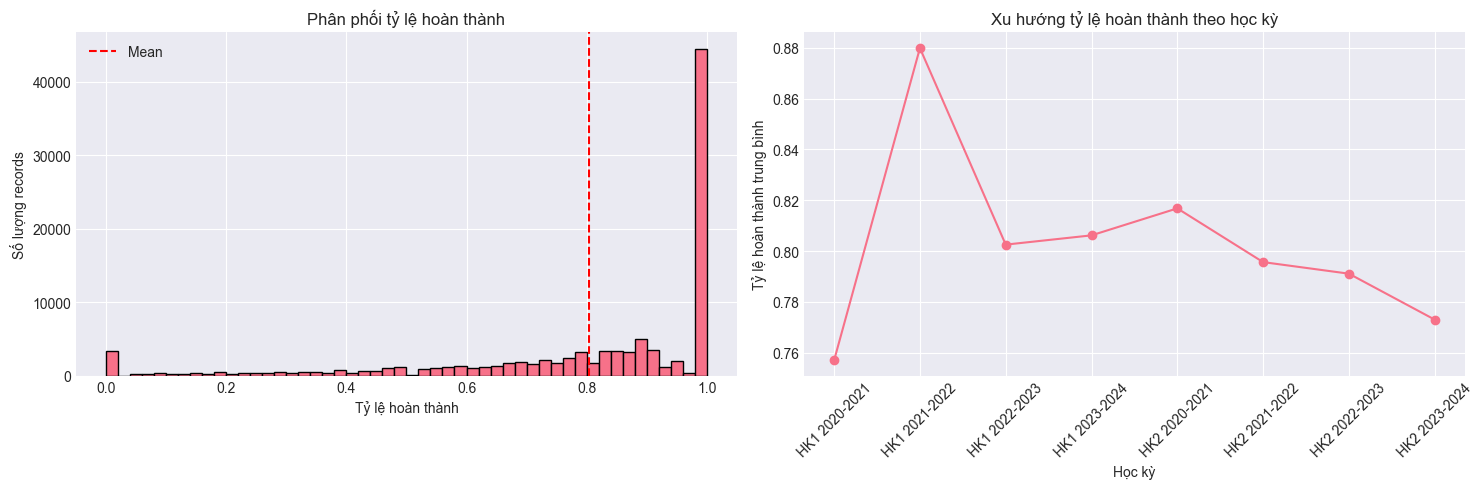

In [12]:
# Phân tích tỷ lệ hoàn thành
academic_df['completion_rate'] = academic_df['TC_HOANTHANH'] / (academic_df['TC_DANGKY'] + 0.01)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of completion rate
axes[0].hist(academic_df['completion_rate'], bins=50, edgecolor='black')
axes[0].set_xlabel('Tỷ lệ hoàn thành')
axes[0].set_ylabel('Số lượng records')
axes[0].set_title('Phân phối tỷ lệ hoàn thành')
axes[0].axvline(academic_df['completion_rate'].mean(), color='red', linestyle='--', label='Mean')
axes[0].legend()

# Completion rate by semester
semester_completion = academic_df.groupby('HOC_KY')['completion_rate'].mean().sort_index()
axes[1].plot(semester_completion.index, semester_completion.values, marker='o')
axes[1].set_xlabel('Học kỳ')
axes[1].set_ylabel('Tỷ lệ hoàn thành trung bình')
axes[1].set_title('Xu hướng tỷ lệ hoàn thành theo học kỳ')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

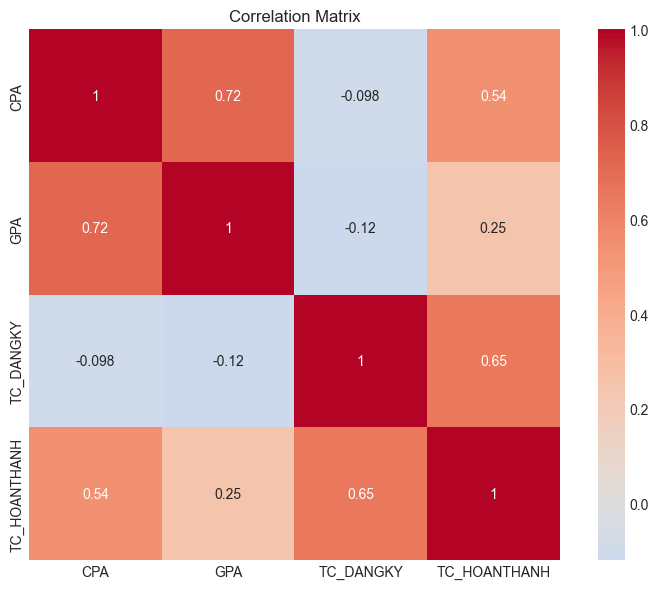

In [13]:
# Correlation matrix
numeric_cols = ['CPA', 'GPA', 'TC_DANGKY', 'TC_HOANTHANH']
corr_matrix = academic_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 4. Phân tích mối quan hệ với Target

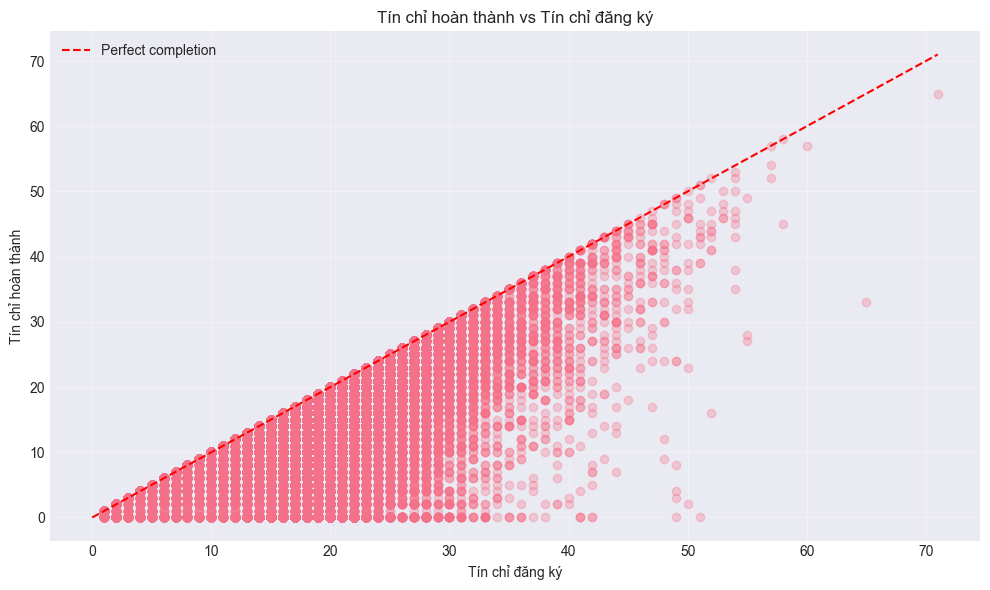

In [14]:
# TC_HOANTHANH vs TC_DANGKY
plt.figure(figsize=(10, 6))
plt.scatter(academic_df['TC_DANGKY'], academic_df['TC_HOANTHANH'], alpha=0.3)
plt.plot([0, academic_df['TC_DANGKY'].max()], [0, academic_df['TC_DANGKY'].max()], 
         'r--', label='Perfect completion')
plt.xlabel('Tín chỉ đăng ký')
plt.ylabel('Tín chỉ hoàn thành')
plt.title('Tín chỉ hoàn thành vs Tín chỉ đăng ký')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

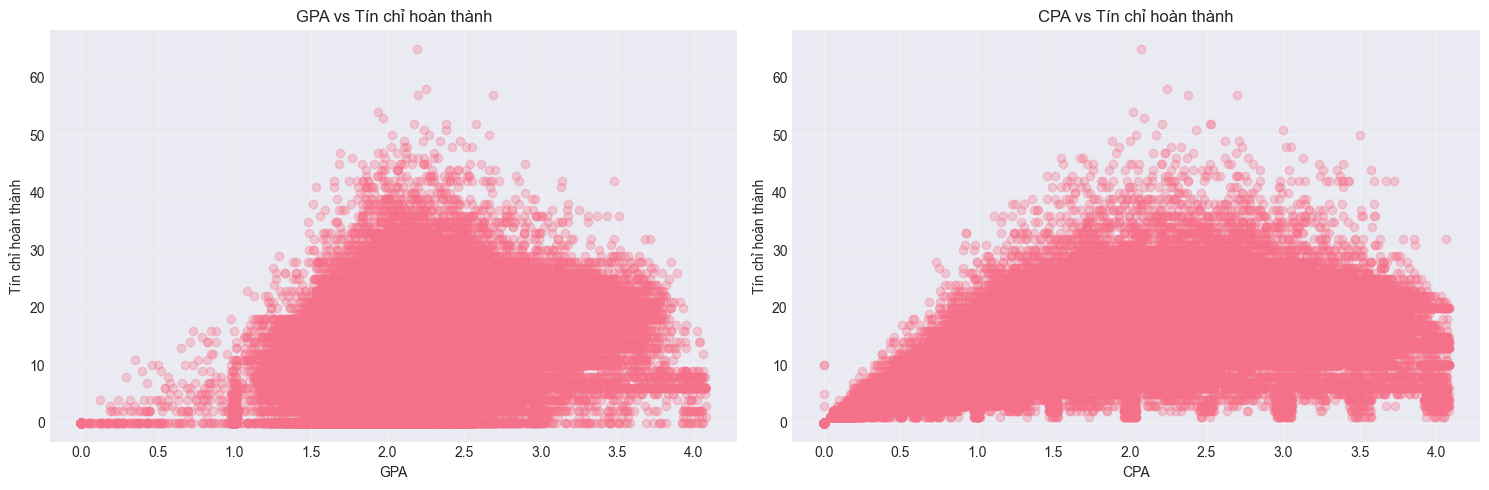

In [15]:
# GPA vs TC_HOANTHANH
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# GPA vs TC_HOANTHANH
axes[0].scatter(academic_df['GPA'], academic_df['TC_HOANTHANH'], alpha=0.3)
axes[0].set_xlabel('GPA')
axes[0].set_ylabel('Tín chỉ hoàn thành')
axes[0].set_title('GPA vs Tín chỉ hoàn thành')
axes[0].grid(True, alpha=0.3)

# CPA vs TC_HOANTHANH
axes[1].scatter(academic_df['CPA'], academic_df['TC_HOANTHANH'], alpha=0.3)
axes[1].set_xlabel('CPA')
axes[1].set_ylabel('Tín chỉ hoàn thành')
axes[1].set_title('CPA vs Tín chỉ hoàn thành')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()